In [1]:
import pandas as pd
import json 
import numpy as np

In [2]:
#df = pd.read_csv('poseidon_Fluorescence.csv', index_col=0) 
df = pd.read_csv('data_analysis_d.csv', index_col=0) 


In [3]:
df = df.dropna(subset=['Sequence'])
df.shape

(1166, 156)

In [125]:
df.isna().sum()

Uptake                  0
Units                   0
Temp.                   0
Method                  0
Type                    0
                       ..
_HydrophobicityD3001    0
_HydrophobicityD3025    0
_HydrophobicityD3050    0
_HydrophobicityD3075    0
_HydrophobicityD3100    0
Length: 156, dtype: int64

In [4]:
df

,Uptake,Units,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,650.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQRRR,0.250000,12.5,650.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,31.25,Mean Fluorescence intensity,23.0,1,5,RKKRRQRR,0.166667,12.5,31.25,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,10.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQR,0.166667,12.5,10.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,22.50,Mean Fluorescence intensity,23.0,1,5,KKRRQRRR,0.166667,12.5,22.50,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,20.00,Mean Fluorescence intensity,23.0,1,5,KRRQRRR,0.166667,12.5,20.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,50.00,Mean Fluorescence intensity,37.0,1,4,RHRHRHRHR,24.000000,50000.0,50.00,0.0,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,100.00,Mean Fluorescence intensity,37.0,1,4,RRHRHRHRHR,24.000000,50000.0,100.00,0.0,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,250.00,Mean Fluorescence intensity,37.0,1,4,RRRHRHRHRHR,24.000000,50000.0,250.00,0.0,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,400.00,Mean Fluorescence intensity,37.0,1,4,RRRRHRHRHRHR,24.000000,50000.0,400.00,0.0,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [5]:
!pip install pybiomed

In [128]:
# from PyBioMed.PyProtein.CTD import (
#     CalculateCTD)


# df = df.reset_index()


# data = CalculateCTD(df['Sequence'][0])
# new_data = {k: list([v]) for k, v in data.items()}
# result = pd.DataFrame.from_dict(new_data)
# for i in range(1, len(df['Sequence'])):
#   slov = CalculateCTD(df['Sequence'][i])
#   result = pd.concat([result, pd.DataFrame.from_records([slov])] ,ignore_index=True)
# df = pd.concat([df, result], axis=1, join='inner')
# df

In [6]:
df['target'].isna().sum()

0

In [7]:
df.shape

(1166, 156)

In [8]:
df = df.dropna(subset = ['target']).drop(columns=['Uptake', 'Units'])
df.shape

(1166, 154)

In [9]:
df = df.dropna(subset = ['Method', 'Type']).reset_index(drop=True)
df.shape

(1166, 154)

In [10]:
df

,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,23.0,1,5,RKKRRQRRR,0.250000,12.5,650.00,0.0,0.111,0.889,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,23.0,1,5,RKKRRQRR,0.166667,12.5,31.25,0.0,0.125,0.875,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,23.0,1,5,RKKRRQR,0.166667,12.5,10.00,0.0,0.143,0.857,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,23.0,1,5,KKRRQRRR,0.166667,12.5,22.50,0.0,0.125,0.875,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,23.0,1,5,KRRQRRR,0.166667,12.5,20.00,0.0,0.143,0.857,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,1,4,RHRHRHRHR,24.000000,50000.0,50.00,0.0,0.000,1.000,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,37.0,1,4,RRHRHRHRHR,24.000000,50000.0,100.00,0.0,0.000,1.000,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,37.0,1,4,RRRHRHRHRHR,24.000000,50000.0,250.00,0.0,0.000,1.000,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,37.0,1,4,RRRRHRHRHRHR,24.000000,50000.0,400.00,0.0,0.000,1.000,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [11]:
df.iloc[:, :7]

,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target
0,23.0,1,5,RKKRRQRRR,0.250000,12.5,650.00
1,23.0,1,5,RKKRRQRR,0.166667,12.5,31.25
2,23.0,1,5,RKKRRQR,0.166667,12.5,10.00
3,23.0,1,5,KKRRQRRR,0.166667,12.5,22.50
4,23.0,1,5,KRRQRRR,0.166667,12.5,20.00
...,...,...,...,...,...,...,...
1161,37.0,1,4,RHRHRHRHR,24.000000,50000.0,50.00
1162,37.0,1,4,RRHRHRHRHR,24.000000,50000.0,100.00
1163,37.0,1,4,RRRHRHRHRHR,24.000000,50000.0,250.00
1164,37.0,1,4,RRRRHRHRHRHR,24.000000,50000.0,400.00


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
knn=df.iloc[:, :7].drop(columns=['Method',	'Type',	'Sequence'])
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
knn_imputer=pd.DataFrame(imputer.fit_transform(knn))

In [13]:
knn_imputer

,0,1,2,3
0,23.0,0.250000,12.5,650.00
1,23.0,0.166667,12.5,31.25
2,23.0,0.166667,12.5,10.00
3,23.0,0.166667,12.5,22.50
4,23.0,0.166667,12.5,20.00
...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00
1162,37.0,24.000000,50000.0,100.00
1163,37.0,24.000000,50000.0,250.00
1164,37.0,24.000000,50000.0,400.00


In [14]:
df['Temp.']=knn_imputer.iloc[:, 0]
df['Time, h']=knn_imputer.iloc[:, 1]
df['Conc., uM']=knn_imputer.iloc[:, 2]
df['target']=knn_imputer.iloc[:, 3]

df = df.drop(columns=['Type', 'Method', 'Sequence'])

In [15]:
df.iloc[:, :4]

,Temp.,"Time, h","Conc., uM",target
0,23.0,0.250000,12.5,650.00
1,23.0,0.166667,12.5,31.25
2,23.0,0.166667,12.5,10.00
3,23.0,0.166667,12.5,22.50
4,23.0,0.166667,12.5,20.00
...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00
1162,37.0,24.000000,50000.0,100.00
1163,37.0,24.000000,50000.0,250.00
1164,37.0,24.000000,50000.0,400.00


Index(['Temp.', 'Time, h', 'Conc., uM', 'target'], dtype='object')


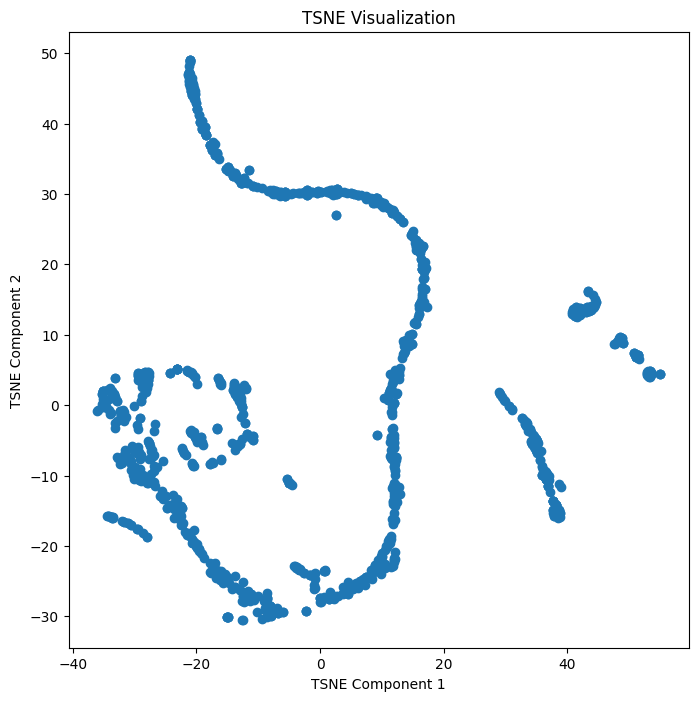

,Temp.,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,...,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,tsne_x,tsne_y,group
0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,11.771453,-3.198707,0
1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-20.691200,-8.387183,2
2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-22.368216,-6.156378,2
3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-21.741386,-7.123490,2
4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-21.945229,-6.863500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,0.444,...,66.667,88.889,0.0,0.0,0.0,0.0,0.0,51.397770,7.110498,1
1162,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,0.400,...,70.000,90.000,0.0,0.0,0.0,0.0,0.0,51.096935,6.804067,1
1163,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,0.364,...,72.727,90.909,0.0,0.0,0.0,0.0,0.0,51.093712,6.805901,1
1164,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,0.333,...,75.000,91.667,0.0,0.0,0.0,0.0,0.0,51.090591,6.807559,1


In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

features = df.iloc[:, :4].columns
print(features)
x = df.loc[:, features].values
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(x)

# Создаем датафрейм для TSNE-результатов
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne_x', 'tsne_y'])

plt.figure(figsize=(8, 8))
plt.scatter(tsne_df['tsne_x'], tsne_df['tsne_y'])

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Visualization')
plt.show()

# Объединяем исходный DataFrame с данными TSNE
combined_df = pd.concat([df, tsne_df], axis=1)
combined_df['group'] = 0
combined_df['group'] = combined_df.apply(lambda row: 1 if ((row['tsne_x'] > 22))
else (2 if (((row['tsne_y'] < 10) & (row['tsne_y'] > -20) & (row['tsne_x'] < 0)) | (row['tsne_y'] < -18) & (row['tsne_x'] < -5)) else 0), axis=1)
combined_df


In [142]:
final = pd.concat([combined_df, a], axis=1)

In [143]:
final

,Temp.,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,...,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,tsne_x,tsne_y,group,Sequence
0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,11.771453,-3.198707,0,RKKRRQRRR
1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,-20.691200,-8.387183,2,RKKRRQRR
2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,-22.368216,-6.156378,2,RKKRRQR
3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,-21.741386,-7.123490,2,KKRRQRRR
4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,-21.945229,-6.863500,2,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,0.444,...,88.889,0.0,0.0,0.0,0.0,0.0,51.397770,7.110498,1,RHRHRHRHR
1162,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,0.400,...,90.000,0.0,0.0,0.0,0.0,0.0,51.096935,6.804067,1,RRHRHRHRHR
1163,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,0.364,...,90.909,0.0,0.0,0.0,0.0,0.0,51.093712,6.805901,1,RRRHRHRHRHR
1164,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,0.333,...,91.667,0.0,0.0,0.0,0.0,0.0,51.090591,6.807559,1,RRRRHRHRHRHR


In [17]:
combined_df['group'].value_counts()

group
0    541
2    435
1    190
Name: count, dtype: int64

C:\Users\ebril\AppData\Local\Temp\ipykernel_11392\2247463418.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_groups))  # Используем 'viridis' для примера
C:\Users\ebril\AppData\Local\Temp\ipykernel_11392\2247463418.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(group_points['tsne_x'], group_points['tsne_y'], c=colors(i), label=group)


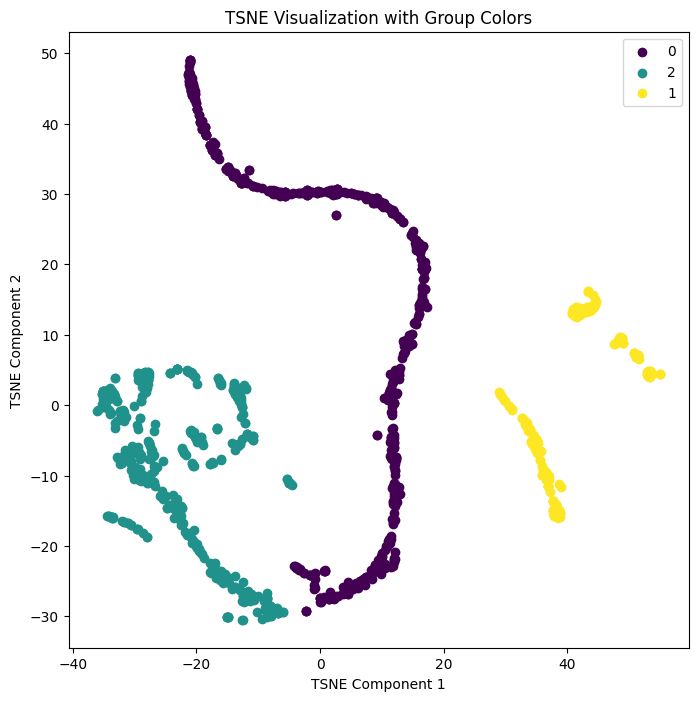

In [18]:
# Создаем датафрейм для графика
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne_x', 'tsne_y'])
tsne_df['group'] = combined_df['group']  # Добавляем столбец 'group' из исходного датафрейма

# Получаем уникальные значения в столбце 'group'
unique_groups = tsne_df['group'].unique()

# Создаем цветовые соответствия для каждой группы (по желанию, можно использовать любую палитру цветов)
colors = plt.cm.get_cmap('viridis', len(unique_groups))  # Используем 'viridis' для примера

# Строим график
plt.figure(figsize=(8, 8))

for i, group in enumerate(unique_groups):
    # Выбираем точки для текущей группы
    group_points = tsne_df[tsne_df['group'] == group]
    plt.scatter(group_points['tsne_x'], group_points['tsne_y'], c=colors(i), label=group)

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Visualization with Group Colors')
plt.legend()  # Добавляем легенду
plt.show()

In [20]:
df = combined_df

In [149]:
df

,Temp.,"Time, h","Conc., uM",target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,...,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,tsne_x,tsne_y,group
0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,11.771453,-3.198707,0
1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-20.691200,-8.387183,2
2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-22.368216,-6.156378,2
3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-21.741386,-7.123490,2
4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-21.945229,-6.863500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,0.444,...,66.667,88.889,0.0,0.0,0.0,0.0,0.0,51.397770,7.110498,1
1162,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,0.400,...,70.000,90.000,0.0,0.0,0.0,0.0,0.0,51.096935,6.804067,1
1163,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,0.364,...,72.727,90.909,0.0,0.0,0.0,0.0,0.0,51.093712,6.805901,1
1164,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,0.333,...,75.000,91.667,0.0,0.0,0.0,0.0,0.0,51.090591,6.807559,1


In [21]:
import re

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df = df.drop(['tsne_x', 'tsne_y'], axis = 1)

In [22]:
df_0 = df[df['group'] == 0]
df_1 = df[df['group'] == 1]
df_2 = df[df['group'] == 2]


In [23]:
df_list = [df_0, df_1, df_2]

In [24]:
# @title scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
def data_prep(data):
  X = data.drop(['group', 'target'], axis = 1)
  y = data[['target']]
  X_scaled = X.copy()
  scalers = {}  # Словарь для хранения scaler'ов для каждого столбца

  for column in X.iloc[:, 4:].columns:
  #for column in X.columns:
    scaler = MinMaxScaler()
    X_scaled[column] = scaler.fit_transform(X[[column]])
    scalers[column] = scaler


  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



  return X_train, X_test, y_train, y_test

In [25]:
!pip install lightgbm
!pip install seaborn
!pip install matplotlib

In [26]:
# @title LGBM
import lightgbm as lgb
import lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def LGBM(X_train, y_train, X_test, y_test):
    """
    Обучает модель LightGBM для регрессии и оценивает ее производительность.

    Args:
        X_train (pd.DataFrame): Обучающие данные.
        y_train (pd.Series): Целевые значения для обучающих данных.
        X_test (pd.DataFrame): Тестовые данные.
        y_test (pd.Series): Целевые значения для тестовых данных.
    """

    reg = lgb.LGBMRegressor()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
# Cross-validation for R^2
    scores_r2 = cross_val_score(reg, X_train, y_train, cv=5)

    y_pred_train = reg.predict(X_train)


    print('LightGBM Model MSE: {0:0.4f}'.format(mse))
    print('LightGBM Model R2 score: {0:0.4f}'.format(r2))
    print('Cross-validation R^2 scores: {0}'.format(scores_r2))


    train_mse = mean_squared_error(y_train, y_pred_train)
    y_pred_train_r2 = reg.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train_r2)


    print('Train MSE: {0:0.4f}'.format(train_mse))
    print('Train R^2: {0:0.4f}'.format(train_r2))
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    print("Test MSE:", test_mse)
    print("Test R^2:", test_r2)

    # Построение графика важности признаков
    lightgbm.plot_importance(reg, max_num_features=60, height=0.9)
    plt.show()

    feature_importance = reg.feature_importances_

    # Нормализация значений важности признаков
    normalized_importance = feature_importance / np.sum(feature_importance)
    sorted_indices = np.argsort(normalized_importance)[::-1]  # Сортировка в порядке убывания

    # Ограничение количества значений для отображения (например, первые 10 значений)
    top_n = 25
    sorted_indices = sorted_indices[:top_n]

    # Сортировка значений и признаков
    sorted_importance = normalized_importance[sorted_indices]
    sorted_features = X_train.columns[sorted_indices]

    # Построение графика с отсортированными и ограниченными значениями важности признаков
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_importance, y=sorted_features)
    plt.xlabel('Normalized Importance')
    plt.ylabel('Features')
    plt.title('Top {} Feature Importance'.format(top_n))
    plt.show()

In [27]:
def evaluate(data):
    X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data)
    print('LGBM')
    LGBM(X_train_scaled, y_train, X_test_scaled, y_test)

LGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6628
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 150
[LightGBM] [Info] Start training from score 3600.949907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

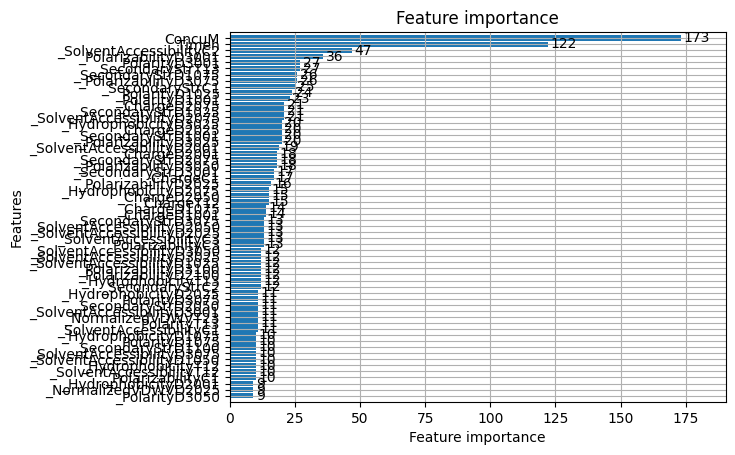

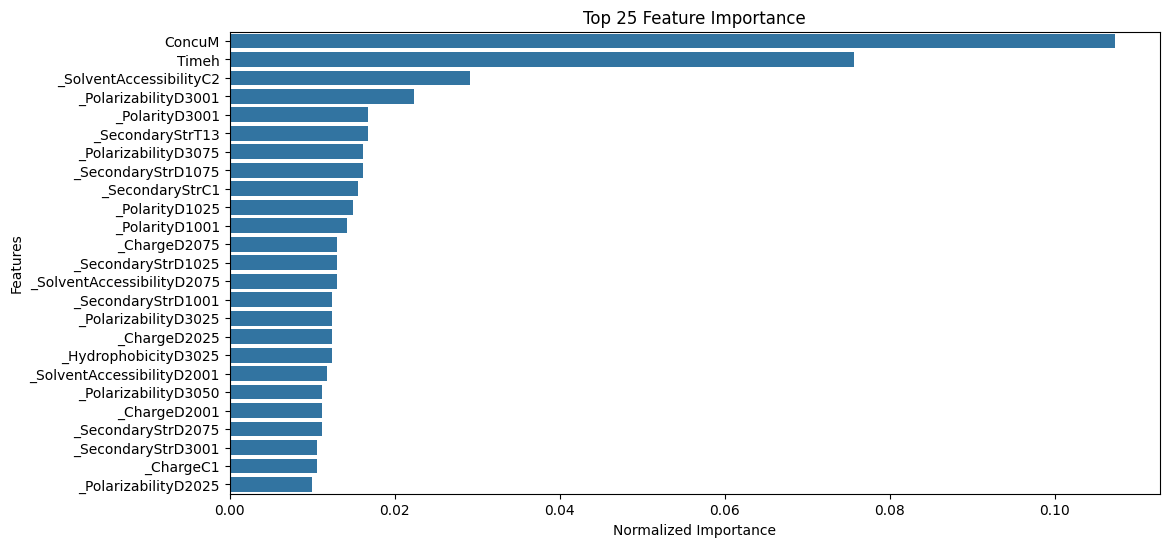

In [28]:
evaluate(df_0)

LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3221
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 150
[LightGBM] [Info] Start training from score 618.999145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

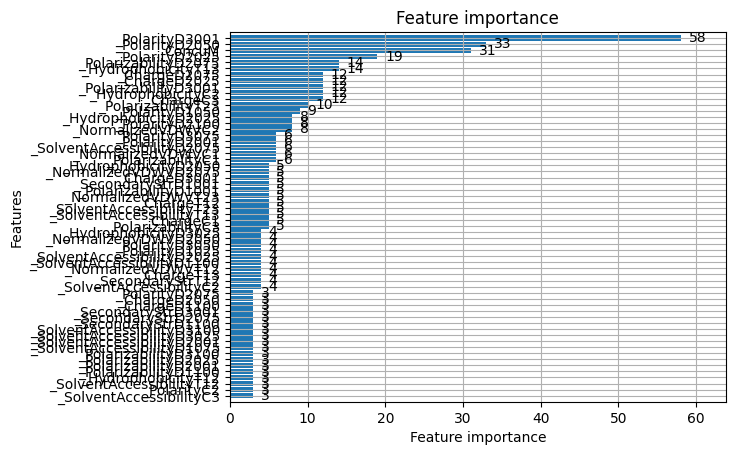

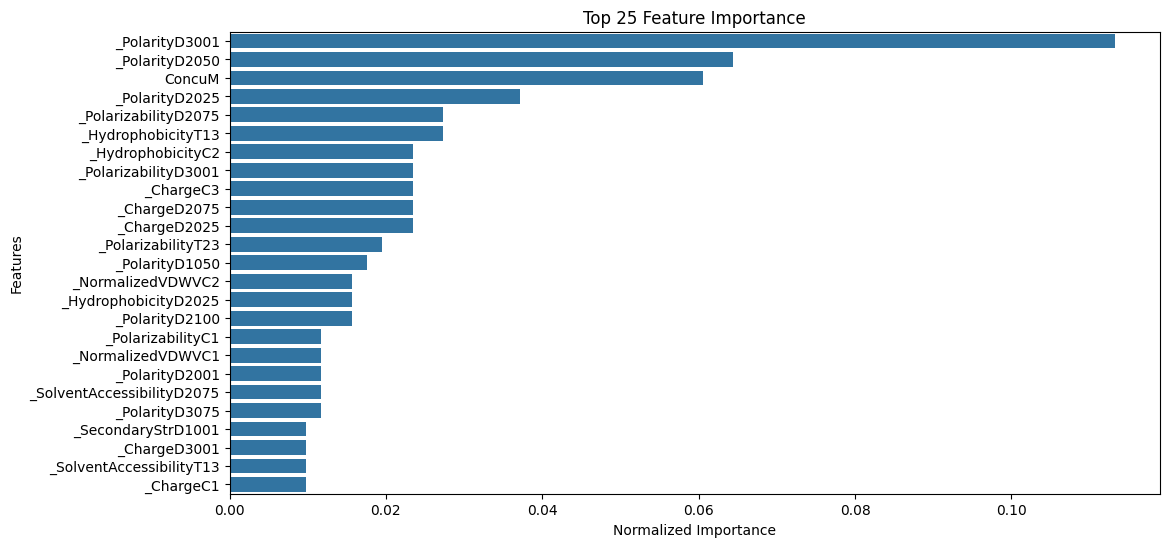

In [29]:
evaluate(df_1)

LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6570
[LightGBM] [Info] Number of data points in the train set: 348, number of used features: 150
[LightGBM] [Info] Start training from score 35.309215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

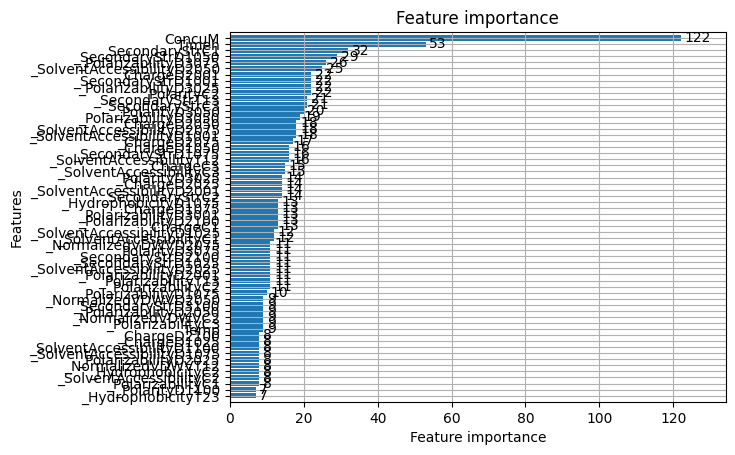

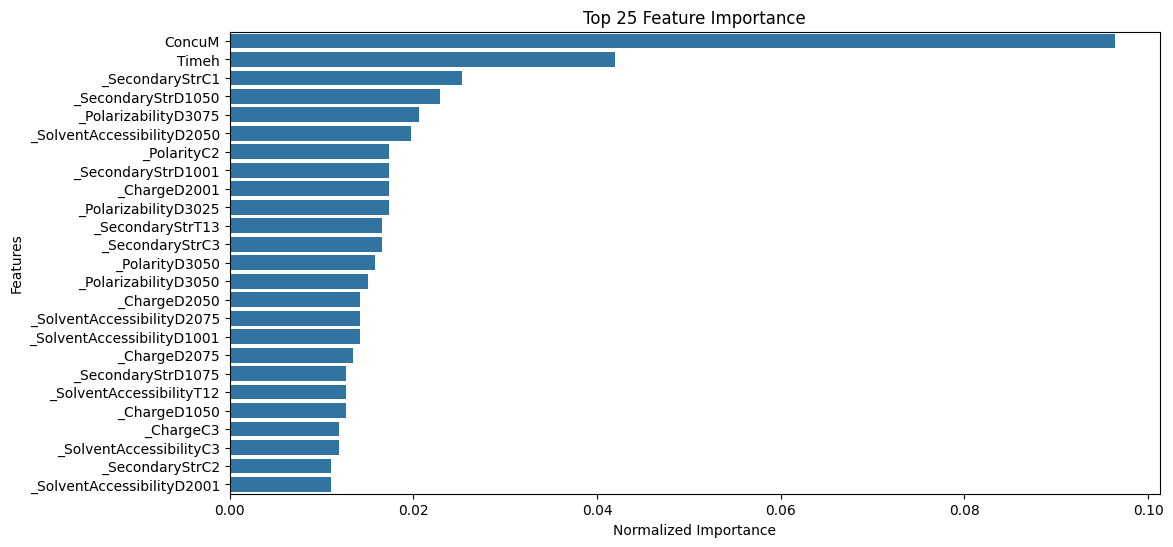

In [30]:
evaluate(df_2)

In [31]:
df

,Temp,Timeh,ConcuM,target,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,...,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100,group
0,23.0,0.250000,12.5,650.00,0.0,0.111,0.889,0.0,1.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0
1,23.0,0.166667,12.5,31.25,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2
2,23.0,0.166667,12.5,10.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2
3,23.0,0.166667,12.5,22.50,0.0,0.125,0.875,0.0,1.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2
4,23.0,0.166667,12.5,20.00,0.0,0.143,0.857,0.0,1.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,37.0,24.000000,50000.0,50.00,0.0,0.000,1.000,0.0,0.556,0.444,...,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0,1
1162,37.0,24.000000,50000.0,100.00,0.0,0.000,1.000,0.0,0.600,0.400,...,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0,1
1163,37.0,24.000000,50000.0,250.00,0.0,0.000,1.000,0.0,0.636,0.364,...,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0,1
1164,37.0,24.000000,50000.0,400.00,0.0,0.000,1.000,0.0,0.667,0.333,...,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0,1


LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11349
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 150
[LightGBM] [Info] Start training from score 1649.178430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10368
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 150
[LightGBM] [Info] Start training from score 1673.265607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

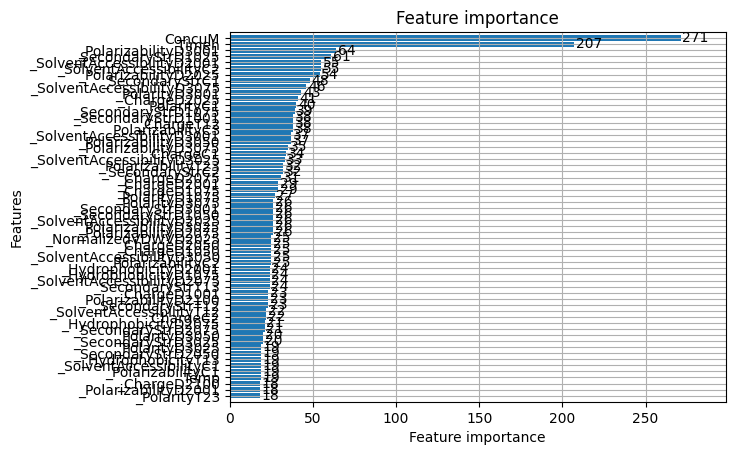

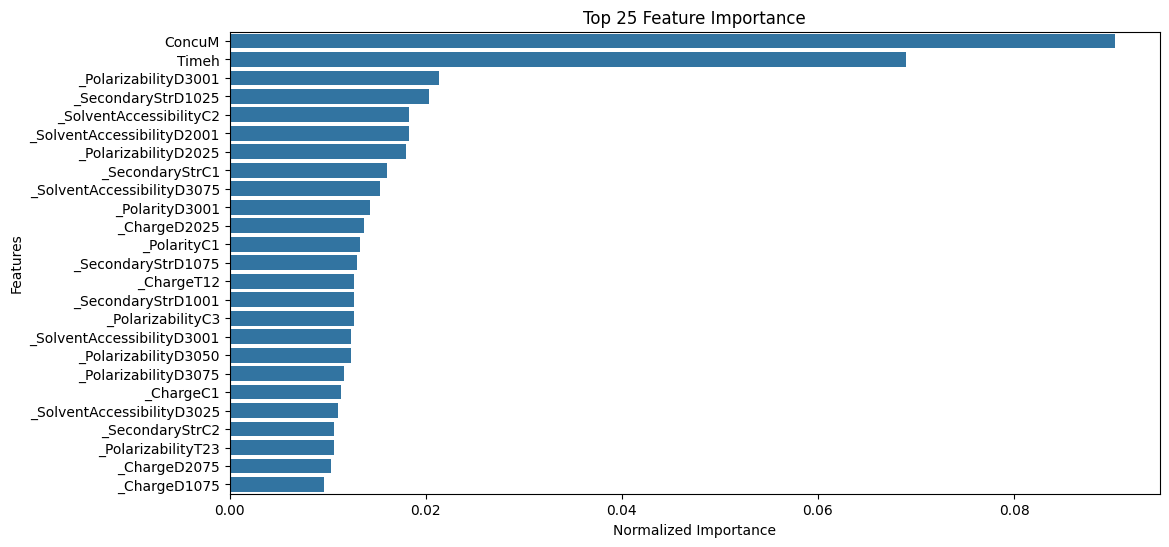

In [32]:
evaluate(df)